# **Abstractive Text Summarization using Natural Language Toolkit**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
DOCUMENT = """
Data science is the study of data to extract meaningful insights for business. It is a multidisciplinary approach that combines
principles and practices from the fields of mathematics, statistics, artificial intelligence, and computer engineering to analyze
large amounts of data. This analysis helps data scientists to ask and answer questions like what happened, why it happened, what will happen,
and what can be done with the results.

Data science is important because it combines tools, methods, and technology to generate meaning from data. Modern organizations are inundated
with data; there is a proliferation of devices that can automatically collect and store information. Online systems and payment portals
capture more data in the fields of e-commerce, medicine, finance, and every other aspect of human life. We have text, audio, video,
and image data available in vast quantities.

While the term data science is not new, the meanings and connotations have changed over time. The word first appeared in the ’60s as
an alternative name for statistics. In the late ’90s, computer science professionals formalized the term. A proposed definition for
data science saw it as a separate field with three aspects: data design, collection, and analysis. It still took another decade for the
term to be used outside of academia.

Artificial intelligence and machine learning innovations have made data processing faster and more efficient. Industry demand has created
an ecosystem of courses, degrees, and job positions within the field of data science. Because of the cross-functional skillset and expertise
required, data science shows strong projected growth over the coming decades.

While the terms may be used interchangeably, data analytics is a subset of data science. Data science is an umbrella term for all aspects of data
processing—from the collection to modeling to insights. On the other hand, data analytics is mainly concerned with statistics, mathematics, and
statistical analysis. It focuses on only data analysis, while data science is related to the bigger picture around organizational data.In most
workplaces, data scientists and data analysts work together towards common business goals. A data analyst may spend more time on routine analysis,
providing regular reports. A data scientist may design the way data is stored, manipulated, and analyzed. Simply put, a data analyst makes sense
out of existing data, whereas a data scientist creates new methods and tools to process data for use by analysts.
"""

In [ ]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

In [ ]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

22

In [ ]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['data science study data extract meaningful insights business',
       'multidisciplinary approach combines principles practices fields mathematics statistics artificial intelligence computer engineering analyze large amounts data',
       'analysis helps data scientists ask answer questions like happened happened happen done results'],
      dtype='<U171')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

#vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
#pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(169, 22)


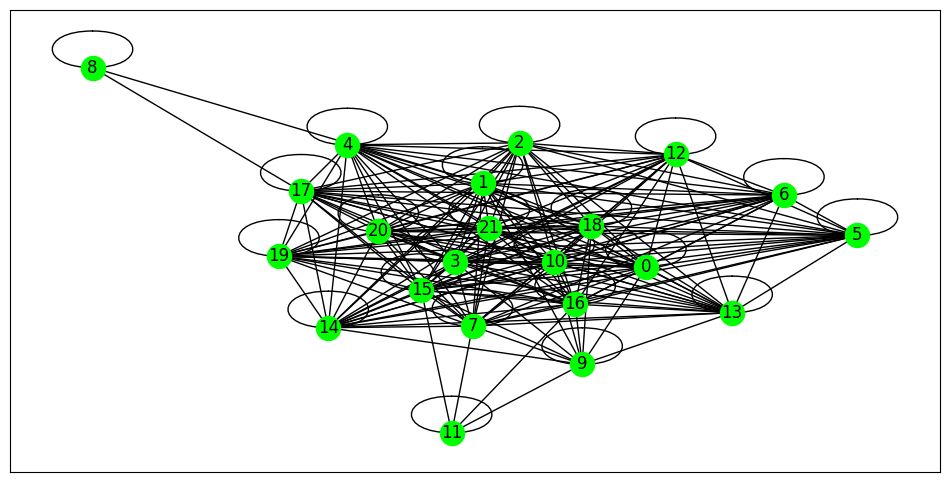

In [ ]:
import networkx
import matplotlib.pyplot as plt
%matplotlib inline
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph


plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [ ]:
from scipy.sparse.linalg import svds

def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(169, 3) (3,) (3, 22)


In [ ]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score
                                            in scores.items()),
                          reverse=True)
ranked_sentences[:10]
top_sentence_indices = [ranked_sentences[index][1]
                        for index in range(num_sentences)]
top_sentence_indices.sort()
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Data science is the study of data to extract meaningful insights for business.
Data science is important because it combines tools, methods, and technology to generate meaning from data.
While the term data science is not new, the meanings and connotations have changed over time.
A proposed definition for data science saw it as a separate field with three aspects: data design, collection, and analysis.
While the terms may be used interchangeably, data analytics is a subset of data science.
Data science is an umbrella term for all aspects of data processing—from the collection to modeling to insights.
It focuses on only data analysis, while data science is related to the bigger picture around organizational data.In most workplaces, data scientists and data analysts work together towards common business goals.
Simply put, a data analyst makes sense out of existing data, whereas a data scientist creates new methods and tools to process data for use by analysts.


#**Using CNN/Daily mail Dataset using SimpleT5**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download google-smartphone-decimeter-challenge

403 - Forbidden


In [ ]:
! kaggle datasets download -d gowrishankarp/newspaper-text-summarization-cnn-dailymail

 97% 486M/503M [00:06<00:00, 85.9MB/s]
100% 503M/503M [00:06<00:00, 77.2MB/s]


In [ ]:
! unzip /content/newspaper-text-summarization-cnn-dailymail.zip

Archive:  /content/newspaper-text-summarization-cnn-dailymail.zip
  inflating: cnn_dailymail/test.csv  
  inflating: cnn_dailymail/train.csv  
  inflating: cnn_dailymail/validation.csv  


In [ ]:
trainning_df = pd.read_csv('/content/cnn_dailymail/train.csv')
trainning_df

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ..."
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...


In [ ]:
MAX_LEN = 512
SUMMARY_LEN = 150
TRAINNING_SIZE = 5000

In [ ]:
trainning_df = trainning_df.iloc[0:TRAINNING_SIZE,:].copy()

trainning_article_ls = list(trainning_df['article'])
trainning_highlight_ls = list(trainning_df['highlights'])

del trainning_df

In [ ]:
from random import sample

for index in sample(list(np.arange(len(trainning_article_ls))),3):
    print('Original Text : ')
    print(trainning_article_ls[index])

    print('\n\nSummary Text : ')
    print(trainning_highlight_ls[index])

    print('===========================================================================================================\n\n')

Original Text : 
By . Hayley O'keeffe . PUBLISHED: . 05:23 EST, 31 October 2013 . | . UPDATED: . 12:53 EST, 31 October 2013 . When artist Alan Dodd was asked by friends to paint a mural on a blank 50-foot-long wall at their home he transformed it into an optical illusion. Friendly faces behind windows and lifelike archways leading to landscapes are painted onto the cottage, in Eye, Suffolk. And the images give an illusion of a make-believe world within. Nationally-renowned artist Alan Dodd stands with the unusual mural that he painted on the side of a friend's home in Eye, Suffolk . The largest painting in the Eye mural is a blacksmith's forge, which takes in the skyline features of the town's church and castle. Quirky characters and also animals feature on other parts of the house side. More... The picture you never thought you'd see... Anna Wintour eating a burger and fries! Artist gives Vogue editor and her fashion friends a calorie-laden makeover . Rare Italian 'San Gennaro' collec

In [ ]:
df = pd.DataFrame(columns=['target_text','source_text'])
df['target_text'] = trainning_highlight_ls
df['source_text'] = ['summarize: '+item for item in trainning_article_ls]
df.head()

,target_text,source_text
0,"Bishop John Folda, of North Dakota, is taking ...",summarize: By . Associated Press . PUBLISHED: ...
1,Criminal complaint: Cop used his role to help ...,summarize: (CNN) -- Ralph Mata was an internal...
2,"Craig Eccleston-Todd, 27, had drunk at least t...",summarize: A drunk driver who killed a young w...
3,Nina dos Santos says Europe must be ready to a...,summarize: (CNN) -- With a breezy sweep of his...
4,Fleetwood top of League One after 2-0 win at S...,summarize: Fleetwood are the only team still t...


In [ ]:
pip install --upgrade simplet5

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simplet5: filename=simplet5-0.1.4-py3-none-any.whl size=6857 sha256=44aad9852b9f6523cf256d0834f719ca1a4db126b14cef1f78551f6da071dc12
  Stored in directory: /root/.cache/pip/wheels/b4/7d/af/743765400878438a7593f13f89fdf4004dcde0f2a8e6cb6684
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=eecbe38c18df68433b370be6c0a95120173822e259870c08f4ff134d58e9ab17
  Stored in dire

In [ ]:
from simplet5 import SimpleT5

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")

In [ ]:
MAX_EPOCHS = 5

In [ ]:
!pip install --upgrade torch
!pip install --upgrade pytorch-lightning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.5.10
    Uninstalling pytorch-lightning-1.5.10:
      Successfully uninstalled pytorch-lightning-1.5.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
simplet5 0.1.4 requires pytorch-lightning==1.5.10, but you have pytorch-lightning 2.0.4 which is incompatible.


In [ ]:
import torch
import json
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

no_tune_model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

device = torch.device('cpu')

In [ ]:
from random import sample

for index in sample(list(np.arange(len(trainning_article_ls))),5):
    print('Original Text : ')
    print(trainning_article_ls[index])

    print('\n\nSummary Text : ')
    print(trainning_highlight_ls[index])

    print('\n\nNot Fine tuned Predicted Summary Text : ')
    preprocess_text = trainning_article_ls[index].strip().replace("\n","")
    t5_prepared_Text = "summarize: "+preprocess_text
    tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)
    summary_ids = no_tune_model.generate(tokenized_text,
                                        num_beams=4,
                                        no_repeat_ngram_size=2,
                                        min_length=30,
                                        max_length=SUMMARY_LEN,
                                        early_stopping=True)
    output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print(output)
    print('===========================================================================================================\n\n')

Original Text : 
By . Sophie Borland . New figures show the NHS is short of 12,500 nursing posts with many hospitals struggling to recruit highly trained, senior staff . Older nurses who have quit the NHS are being urged back onto wards over concerns of desperate staffing shortages. Officials are drawing up plans to try to entice back nurses who left ten or 20 years ago to start families or pursue different careers. New figures show the NHS is short of 12,500 nursing posts with many hospitals struggling to recruit highly trained, senior staff. The push for older nurses comes as critics say modern nursing training creates nurses with degrees who are ‘too posh to wash’ patients - although nursing unions fiercely reject the claim. Concerns have also been raised that nurses with university degrees lack hands-on experience in care as they have spent too much time in the classroom. Health Education England, the body in charge of recruitment, is preparing to launch a campaign to encourage bac